<a href="https://colab.research.google.com/github/lewisnjue/AI/blob/main/computer_vision_and_convolution_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## what is a computer vision problem
a computer vision problem invovles developing algorithms and models that enable computer to nterapret, analyze and understand visula dat from the world, such as image and videos. these problems often involves taks that mimic human visua perception and processing .

#### common computer vison problems

* image classificaion
* object detection
* segmentaion
* image generation
* facial recognition
* object tracking
* pose estimatin
* optical character recognition
* image restoration
* actin recognition
* anomaly detection in visual data
and many more


### inputs and outputs of a computer vision problem

it depends on the specific task being solved

inputs :
image data:
  - single image
  - image sequences ( videos)
  - 3D data
metadata
pre labled data


outputs:

the output are task specific and represetn the desired interpretaio or decsion based on the input data . common outputs include:

1. for image classficaion:
  - a single lable ( eg cat) or multiple lables
2. for object detection:
  - bounding boxes : coordinates aroud detected objects
  - class lables: lable for each detected object
  - confidence scores: a probability indicating the certaintly of the detection

3. for image segmentaion:
  - semantic segmetnation: a mask where each pixel has a class lable( eg sky )
  - instance segmentaion: a mask for each object intance , separitng ovelapping objects
and many more

these mappings ensure computers can precess visual inforation and return actinable insights


in computer vsion ( and deep learning in general) , batch size refers to the number of samples ( images in the case of coputer vision ) processed together in one forward and backward pass through the neural network . it plays a critical rele in traing deep learingmodels and influences several spacests of the process:


key points about batch_size:

1. fowrad pass and backward pass:
  - during the forward pass, the neural network computers predictions for all image in the batch.
  - in the backward pass , gradietns are computed for the loss assocaited with the batch and used to update model parametes.
2. memory usage:
  - larger batches require more memory ( GPU/ CPU RAM ) as they model needs to hlod intermediate comutations and gradients for all images in the batch.
3. traing stability:
  - small batch sizes: thse often result in noisier gradient updates but can generalize better . they allow the model to train with less memory makign it easir to handle larger modles or datasets.
  - large batch sizers: these provide more stable gradient updates as they average the gradients over more samples . however they may rqurie more computational resources.

4. train speed:
  - larger batch sizers often result in faster traning per epoch since more samples are processed simultainesouly
  - smaller batch sizes might take longer per epoch but can provide quicker model convergence due to noiseir graidents.
5. common batch sizes:
  - powers of 2 eg 16, 32 etc
  - the choice often depends on the available computational resources , model size and dataset size.
  

# computer vision libaries in pytorch

* `torchvision` base domain
* torchvisio.datasets - get datasets and data loaidng for computer vison here
* `torchvision.models` - get pretrained coputer vision models that you can revelrage foryour own problem
* `torhcvision.trafnorm ` fountion for manipulaint your vision data ( images) to be suitable for use with an ML model

* `torch.utils.data.Dataset` - base datasets class for pytorch
* ` torhc.utils.data.DataLoader` - create a pytorhc iterable over a dataset


In [1]:
# import pytorch
import torch
from torch import nn
#import torch vision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.transforms import ToPILImage
from torchvision.transforms import transforms

# import matplotlib for visualizaion
import matplotlib.pyplot as plt

# check version
print(torch.__version__)
print(torchvision.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"




2.6.0+cu124
0.21.0+cu124


### getting the datasets


FashionNMIST is the dataset we are going to use


In [2]:
# setup traing data
train_data = datasets.FashionMNIST(
    root="data",# where to download dat to
    train=True,# do we want the traing dataset
    download=True, # do we want to download it ?
    transform=ToTensor(), # what do we want to tranform our image
    target_transform=None # do we want to tranform the labes / targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 189kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.48MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.1MB/s]


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# see the first traing example
image , label = train_data[0]

In [5]:
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names
train_data.classes[label]

'Ankle boot'

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
# checkthe shape of our images

image.shape, label

(torch.Size([1, 28, 28]), 9)

#### visualizing random samples of data

In [10]:
%matplotlib inline

In [11]:
image , label = train_data[0]
print(f"image shape: {image.shape}, label: {label}")

image shape: torch.Size([1, 28, 28]), label: 9


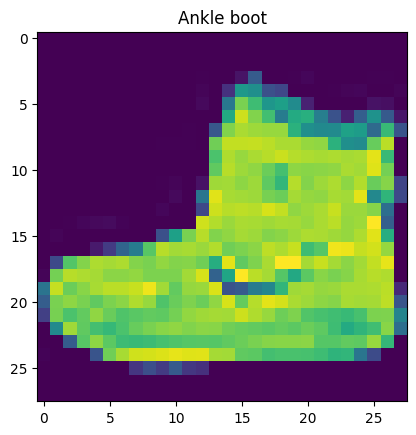

In [12]:
plt.imshow(image.squeeze())
plt.title(train_data.classes[label])
plt.show()

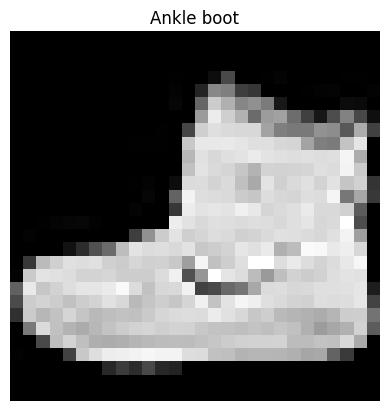

In [13]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(train_data.classes[label])
plt.axis(False)
plt.show()

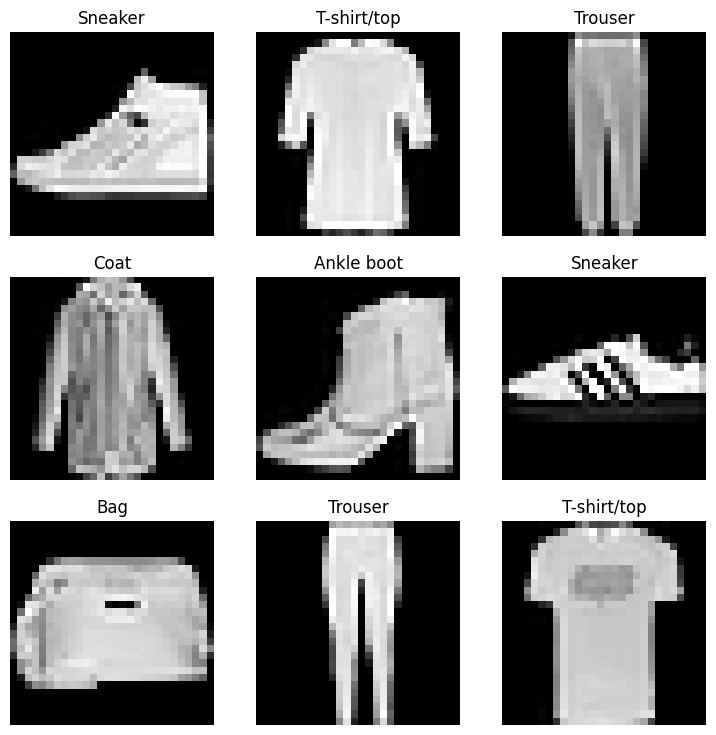

In [14]:
# plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
for i in range(9):
    random_idx = torch.randint(0,len(train_data),(1,)).item()
    image, label = train_data[random_idx]
    fig.add_subplot(3,3,i+1)
    plt.imshow(image.squeeze(),cmap="gray")
    plt.title(train_data.classes[label])
    plt.axis(False)
plt.show()

### prepare data loader
right now , our data is in form of pytorch datasets
dataloaser turns our dataset into a pytoython iterable.

more specifically , we want to trn our data into batches or mini-batches.
why would we do this ?

1. it is more computationally efficent , as in your computing hardawre may not be alble to lok ( sotre in memory) at 6000 image in oione hit . so we break it down to 32 images at a tme ( batch size of 32)
2. it gives our neural network more chances to update ints gradient per epoch


In [15]:
from torch.utils.data import DataLoader

# setup teh batchsize hyperparameter
BATCH_SIZE = 32
# turn datasets into iterables (batches)

train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=1,# numbers of cores to use for this case i have set it to 1
    pin_memory=True
)
test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=1,
    pin_memory=True
)


In [16]:
#lets check out waht weve created
print(f"Dataloader: {train_dataloader}\nLength: {len(train_dataloader)}\nType: {type(train_dataloader)}")
print(f"Dataloader: {test_dataloader}\nLength: {len(test_dataloader)}\nType: {type(test_dataloader)}")


Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7e851c4eba90>
Length: 1875
Type: <class 'torch.utils.data.dataloader.DataLoader'>
Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7e85130a0050>
Length: 313
Type: <class 'torch.utils.data.dataloader.DataLoader'>


image shape: torch.Size([1, 28, 28]), label: 7


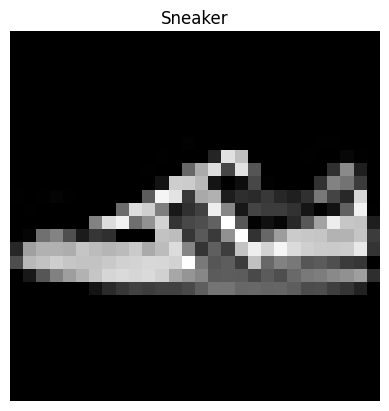

In [17]:
# show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0,len(train_data),(1,)).item()
image, label = train_data[random_idx]
print(f"image shape: {image.shape}, label: {label}")
# plot the image
plt.imshow(image.squeeze(),cmap="gray")
plt.title(train_data.classes[label])
plt.axis(False)
plt.show()


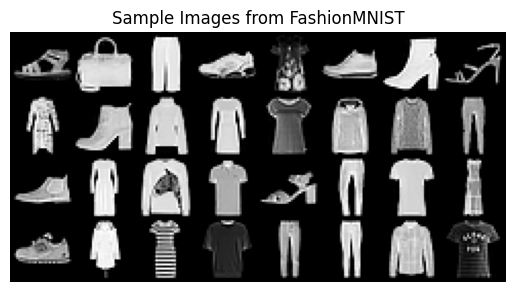

In [18]:
images, labels = next(iter(train_dataloader))

# Create the grid of images
grid_img = torchvision.utils.make_grid(images)

# Display the grid
plt.imshow(grid_img.permute(1, 2, 0))  # permute to change channel order for matplotlib
plt.title('Sample Images from FashionMNIST')
plt.axis('off')
plt.show()


## creating a baseline with tow linear layers

when staring to build a series of machine leanring modellign exprements , tis best practice to start with a baseline model.

in other words  start simply and add complexity when necessary .



In [19]:
# create a flatten layer
flatten_layer = nn.Flatten()
output = flatten_layer(image)
output.shape
print("output beforflattening",image.shape)
print("output afterflattening",output)

output beforflattening torch.Size([1, 28, 28])
output afterflattening tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000

In [20]:
from torch import nn
class FashioMNISTModelV0(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_shape)
        )
    def forward(self,x:torch.Tensor):
        return self.layer_stack(x)




In [21]:
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
# setup model with input parameters

model_0 = FashioMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names) # one for every class
).to(device)

model_0.to(device)
model_0

FashioMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
dummy_x = torch.rand((1,28,28))
dummy_x.shape
model_0(dummy_x.to(device))


tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], device='cuda:0', grad_fn=<AddmmBackward0>)

### setyp loss optimzer and evaluation metrics

* loss function - snce were working with multiclass data, our loss funtion will be `nn.CrossEntropyLoss()`
* optimizer -our optimzer `torch.optim.SGD`
* evaluteion metric - since were workign on a classifcion broblem we are going to use accurary score



In [23]:

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


In [24]:
# import accurary matric
from helper_functions import accuracy_fn

# setup loss funtion and optimzer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)



### creating a funtion to time our expreriments
machine learning is very exprimental
model perforamce( loss and accuracy values) and hos fat it runs
|

In [25]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
    start (float): Start time of computation (preferred in timeit format).
    end (float): End time of computation.
    device ([type], optional): Device that compute is running on. Defaults to None.

    If device is None, use "CPU".
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


### creating a training loop and traingin a model on batchesof data


1. loop throught epoces.
2. loop throught traingin batches, perform triangin steps , calculate teh train loss *per batch* .
3. loop thorugh tesing batches, perform tasting stpes, claclute the test loss

4. prnt out what happeing
5. time it all ( for fun )

In [26]:
# import tqdm for the progress bar

from tqdm.auto import tqdm

# set the seed adn start the timer

torch.manual_seed(42)
train_time_start_on_cpu = timer()
# set the number of epocs( wer keep this small for fater traiing time)
epochs = 3

# create traing and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n........")
  # traing
  train_loss = 0
  # add a loop to loop thorouth the traing batches
  for  batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    ## forward pass
    y_pred = model_0(X.to(device))
    loss = loss_fn(y_pred,y.to(device))
    train_loss += loss
    ## optimizer zero grad
    optimizer.zero_grad()
    ## loss backward
    loss.backward()
    ## optimizer step
    optimizer.step()

    # print out what happening
    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  # divde total train loss by length of train dataloader
  train_loss = train_loss / len(train_dataloader)

  ## TESING
  test_loss = 0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      test_pred = model_0(X.to(device))
      loss = loss_fn(test_pred,y.to(device))
      test_loss += loss
    # Calculate average test loss within inference mode
    # This avoids the inplace update error
    test_loss = test_loss / len(test_dataloader)
  ## print out what happend
  print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f}")

  # print out waht happeing
  print(f"Epoch: {epoch+1} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")
  # cacluatte training time
  train_time_end_on_cpu = timer()
  total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=device)
  # for now it is cpu for now i will change later to GPU so kepp that in mind

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
........
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.59039 | Test loss: 0.50954
Epoch: 1 | Train Loss: 0.59039 | Test Loss: 0.50954
Train time on cuda: 12.711 seconds
Epoch:1
........
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.47633 | Test loss: 0.47989
Epoch: 2 | Train Loss: 0.47633 | Test Loss: 0.47989
Train time on cuda: 26.019 seconds
Epoch:2
........
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.45503 | Test loss: 0.47664
Epoch: 3 | Train Loss: 0.45503 | Test Loss: 0.47664
Train time on cuda: 38.662 seconds


In [27]:
str(next(model_0.parameters()).device)

'cuda:0'

## make predictins and get model 0 results

In [28]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,data_loader: torch.utils.data.DataLoader,loss_fn: torch.nn.Module,accuracy_fn,device: torch.device = device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      loss /= len(data_loader)
      acc /= len(data_loader)
  return {"model_name": model.__class__.__name__, # this only workds when model was created by class
          "model_loss": loss.item(),
          "model_acc": acc}



# cacluate model 0 results on the dataset
model_0_results = eval_model(model=model_0,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn,
                              device=device)
model_0_results






{'model_name': 'FashioMNISTModelV0',
 'model_loss': 0.0010611432371661067,
 'model_acc': 0.30028917735831345}

In [29]:
device

'cuda'

### MOdel 1 buind a model with non linearity

we learned about the power of non linearity


In [30]:
import torch
from torch import nn

# create a model with non lieanr and linear layer

class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape,out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units,out_features=hidden_units), # Changed: Using hidden_units instead of undefined 'output'
      nn.ReLU(),
      nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [31]:
# create an instance of model_1

torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                                hidden_units=10,
                                output_shape=len(class_names)).to(device)


In [32]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [33]:
# create a loss funtion, optimzer and evalation metrics

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()# measure how wrong our model is

optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1) # try to change the parameter of our model to reduce the loss please dont forget that



### funtionaizing traing and evaluaitn and evalutin/tesing loops

* funtion for training - train_step()

* testng loop test_step()


In [34]:

def train_step(model: torch.nn.Module,
                dataloader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_fn,
                device: torch.device = device):
  model.train()
  train_loss, train_acc = 0, 0
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Looked at {batch * len(X)}/{len(dataloader.dataset)} samples")
  return {"model_name": model.__class__.__name__,
          "model_loss": train_loss.item(),
          "model_acc": train_acc}



def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  model.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      loss = loss_fn(test_pred, y)
      test_loss += loss_fn(model(X), y)
      test_acc += accuracy_fn(y_true=y,
                               y_pred=model(X).argmax(dim=1))
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f"Test loss:{test_loss:.5f} test accurary{test_acc:.5f}")
  return {"model_name": model.__class__.__name__,
          "model_loss": test_loss.item(),
          "model_acc": test_acc}


In [35]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer

train_time_end_on_gpu = timer()

# set epochs

epochs = 3

# create a potimizaton and evalutiaon loop uisng train_step() and test_step()


for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_time_start_on_gpu = timer()
  train_step(model=model_1,
              dataloader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)

  test_step(model=model_1,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
  print(f"Train time: {train_time_end_on_gpu - train_time_start_on_gpu}")
  train_time_end_on_gpu = timer()
  total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 59968/60000 samples
Test loss:0.50092 test accurary82.08866
Train time: -0.012660470000014357
Train time on cuda: 13.279 seconds
Epoch: 1
---------
Looked at 59968/60000 samples
Test loss:0.48896 test accurary82.68770
Train time: -0.0010014609999871027
Train time on cuda: 13.456 seconds
Epoch: 2
---------
Looked at 59968/60000 samples
Test loss:0.48580 test accurary82.88738
Train time: -0.0010270770000033735
Train time on cuda: 13.581 seconds


In [36]:
model_1_results = eval_model(model=model_1,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn,
                              device=device)
model_1_results # something is wrong here

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.0010377130238339305,
 'model_acc': 0.30032097394468066}

### buinding convolutional neural netowork (CNN)

cnns are known for thier capabilities to learn pattern in visual data

a convolutional neurlal network (CNN) is a type of deep learnign architecture specifcally designed for processing grid-like data such as images. its arcitecure is composed of several keylayers

1. CONVOLUTIONAL LAYER:
  - filters: the code of CNNs , filter ( or kernels) are samll matrices tha slide over the input image, performing element-wise multiplicaion and summation.
  - featur extraction: filters extract specific features from the input image, such as edges , ocrnders or textures.
  - activation function: a non linear function like RELU is applied to inroduce non linearity and imporve the networks ability to learn complex patterns
2. poolint layer:
  - downstampling: reduces the spatial dimensinas of the feature maps , therby reducing computaional cost and preventing overfitting.
  - feature preservation: preserves the most important features extrated by the convolutional layers.
  - common types: max pooling and average pooling are the most common types

3. fully connected layer:
  - classifcaion : connects all neuraons in the previous layer to every neuron in the current layer.
  - decision making : performs classificaon or regression taks by mapping the high level features extracted by the convolutional and pooling layers to output classes or values.



#### key concepts

- feature maps : the output of a convolutional layer, representing the activation of filters at different positions in the input image.
- stride: the number of pixes by whcih the filter si shifted in each step.
- padding: adding zeros around the input image to control the output size of the convolutional layer.
- depth : the number of filters applied to the input image.


#### advanced CNN architectures:

- leNet-5: one of hte eariles CNN architecures, used for digit recongnition.

- AlexNet: a deeper CNN that introduced the use of RELU activaion and dropout .

- VGGNet: knwon for its simple archtecture with multiple convolutional laeyrs stacked together .
- GoogleLeNet(inception): Uses inception modules to efficiently extract features at multiple scales.
- ResNet: Incorporates residucal connections to enable traing deepr networks.
- DenseNet: connects each layer to every other layer in a feed -fowrad manner.



In [37]:
# create a convolutional nearual network
class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self,x:torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x




In [38]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1,
                                hidden_units=10,
                                output_shape=len(class_names)).to(device)


### stepping thorugh nn.conv2d

### UNNDERSTANDING CNN LAYERS IN DEEP LEARNING

convolutional nerural networks (CNNs) are powerful architectures for processing grid-like data, such as images, here breakdown of the main layers in CNNs and their roles.


1. convolutional layer(nn.Conv2d)

  - purpose:
    - extract features form the input data by applying a aset of learnable filters(kernes)
    - filters slide over the input iamge , performing elementwise multiplicaions and summations to produce feature maps
  - key hyperparameters:
    - in-channels: number of input channels( eg 3 for RGD images)
    - outchannels: number of filters to apply , determining the depth of the output feature maps.
    - kernel_size: dimensional of the filter
    - stride: step size of the whle sliding
    - padding: adds zeors around the input to preserver spatial dimensionas.

2. activaion funtion(nn.ReLu)
  - purpose:
    - introduces non-linearity to the netwokrk allowing it to model complex relationships .
    - commonly used activaion fuction include ReLue, which sets all negative alues to zero


3. poolign layer( nn.MaxPool2d)
  - purpose:
    - reduces the spatial dimensions of fearue maps , whcih:
      - lower computational cost.
      - provides translationa inariance ( focus on what rather than where)
    - max-pooling takes the maximum value in a window of a given size kernel_size=2


4. flattering(nn.Flatten)

  -purpose:
    - convets the 2d feature maps into a 1D vector for feeding into a flly connected layer.



5. fully connected layer(nn.Linear)
  - purpose:
    - learns high level features and makes final predictions
    - each neuron in this layer is connected to every input neuron from the previous layer


6. softmax/logits layer
  -purpose:
    - produes probailtes for classifcaion taks , mapping outps to values between 0 and 1




```py

class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    # Convolutional Block 1
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1),  # Preserves spatial size
        nn.ReLU(),  # Adds non-linearity
        nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)  # Downscales by 2x
    )
    # Convolutional Block 2
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)  # Another downscale by 2x
    )
    # Classifier Block
    self.classifier = nn.Sequential(
        nn.Flatten(),  # Converts 2D feature maps into 1D
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)  # Fully connected layer
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)  # Pass through conv block 1
    x = self.conv_block_2(x)  # Pass through conv block 2
    x = self.classifier(x)    # Pass through classifier
    return x
```


## how to convert iamge to tensors and even normazie

```py
from torchvision import transforms
from PIL import Image

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes to [-1, 1]
])

# Load an image using PIL
image = Image.open("example.jpg")

# Apply transformations
tensor_image = transform(image)

print(tensor_image.shape)  # Output: [Channels, Height, Width]
```
notes:
In PyTorch, Convolutional Neural Networks (CNNs) expect image data to be represented as tensors. Here's how this works and what you need to do to prepare your image data:
What Format Do PyTorch CNNs Expect?

    Tensor Format:
        PyTorch expects images in the form of tensors with the shape:
        [Batch Size, Channels, Height, Width]
        [Batch Size, Channels, Height, Width] where:
            Batch Size: Number of images in a batch.
            Channels: Number of color channels (e.g., 1 for grayscale, 3 for RGB).
            Height and Width: Spatial dimensions of the image.

    Data Type:
        The tensor should have a float data type (torch.float32).
        Pixel values should typically be normalized to the range [0,1][0,1] or another range such as [−1,1][−1,1] for better training stability.

a

In [39]:
# let create some dammy data
torch.manual_seed(42)
# create a batch of images
images = torch.rand(size=(32,3,64,64))
images.shape


torch.Size([32, 3, 64, 64])

In [40]:
test_image = images[0]
test_image.shape

torch.Size([3, 64, 64])

In [41]:
print(f"Image batch shape:{images.shape}")
print(f"Single image shape:{test_image.shape}")
print(f"Test Image pixel values:\n{test_image}")

Image batch shape:torch.Size([32, 3, 64, 64])
Single image shape:torch.Size([3, 64, 64])
Test Image pixel values:
tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         

In [42]:
# create a simngle convd layer
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=1)

# pass the data throught the convoluational layer
conv_layer(test_image.unsqueeze(dim=0))

tensor([[[[-3.3371e-01, -3.3281e-01, -5.0839e-01,  ..., -2.3694e-01,
           -2.8108e-01, -3.1808e-01],
          [-3.3042e-01, -4.4324e-01, -4.2661e-01,  ..., -4.0290e-01,
           -2.5801e-01, -3.9595e-01],
          [-5.5963e-02, -5.1716e-01, -6.2803e-01,  ..., -2.6973e-01,
           -3.3916e-01, -3.8857e-01],
          ...,
          [-2.7309e-02, -3.8492e-01, -4.6536e-01,  ..., -4.6891e-01,
           -4.6570e-01, -2.2956e-01],
          [-1.9740e-01, -5.4037e-01, -1.7201e-01,  ..., -5.2281e-01,
           -5.0674e-01, -2.9564e-01],
          [-2.5090e-01, -5.9542e-01, -6.7210e-01,  ..., -5.3584e-01,
           -3.1367e-01, -2.2348e-01]],

         [[ 3.9225e-01,  2.5645e-01, -3.9998e-04,  ...,  3.4384e-02,
            3.2497e-01, -2.5311e-01],
          [ 2.9956e-01, -5.3156e-01, -1.8046e-01,  ...,  1.7471e-01,
           -1.2710e-01, -5.2937e-01],
          [-1.2867e-03, -1.5943e-02, -2.4883e-01,  ..., -2.7878e-01,
           -3.0863e-01, -4.3687e-01],
          ...,
     

### stepping throght `nn.MaxPool2d`

In [43]:
test_images = test_image

In [44]:
test_images

tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.9307, 0.2847,  ..., 0.8432, 0.8307, 0.0897],
         [0.7021, 0.5967, 0.7744,  ..., 0.8485, 0.4520, 0.

In [45]:
# print out original image shape without unsquuzed dimension

print(f"Test imsage original shape:{test_image.shape}")
print(f"Test image with unsqueezed dimension:{test_image.unsqueeze(dim=0).shape}")
# create a sample nn.MaxPool2d
max_pool_layer = nn.MaxPool2d(
    kernel_size=2,
    stride=2,
    padding=0
)
# pass dat through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Test image through conv layer shape:{test_image_through_conv.shape}")
# pass data throught the max pool layer

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Test image through conv and max pool layer shape:{test_image_through_conv_and_max_pool.shape}")



Test imsage original shape:torch.Size([3, 64, 64])
Test image with unsqueezed dimension:torch.Size([1, 3, 64, 64])
Test image through conv layer shape:torch.Size([1, 10, 64, 64])
Test image through conv and max pool layer shape:torch.Size([1, 10, 32, 32])


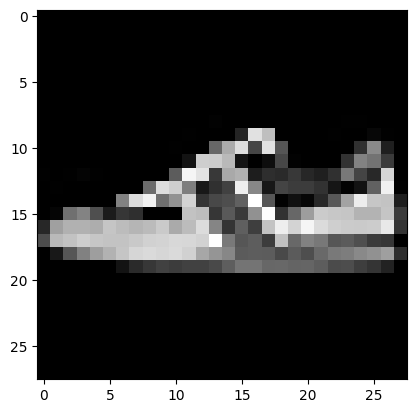

In [46]:
plt.imshow(image.squeeze(),cmap="gray")

In [47]:
model_2(image.unsqueeze(0).to(device))

tensor([[ 0.0313, -0.0628,  0.0532, -0.0229, -0.0163,  0.0166, -0.0044, -0.0050,
          0.0246,  0.0107]], device='cuda:0', grad_fn=<AddmmBackward0>)

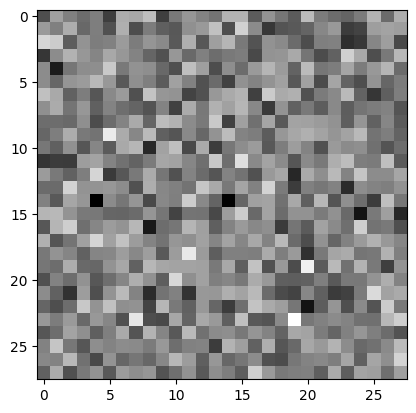

In [48]:
rand_image_tesnor = torch.randn(size=(1,28,28))
rand_image_tesnor
plt.imshow(rand_image_tesnor.squeeze(),cmap="gray")

In [49]:
model_2(rand_image_tesnor.unsqueeze(0).to(device))

tensor([[ 0.0426, -0.0984,  0.0621, -0.0358,  0.0184,  0.0271,  0.0163,  0.0133,
         -0.0038, -0.0115]], device='cuda:0', grad_fn=<AddmmBackward0>)

###  setup a loss funtin and optimzier for `model_2`

In [50]:
# setup loss funtion /eval matrxi / optimzer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.001)

In [51]:
model_2.state_dict() #

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

## training and tesitn g`model_2` using our traiing and test functions

In [52]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()
# train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_2,
              dataloader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)

  test_step(model=model_2,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2, end=train_time_end_model_2, device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 59968/60000 samples
Test loss:2.28269 test accurary12.82947
Epoch: 1
---------
Looked at 59968/60000 samples
Test loss:0.89580 test accurary64.09744
Epoch: 2
---------
Looked at 59968/60000 samples
Test loss:0.77234 test accurary72.02476
Train time on cuda: 46.218 seconds


In [53]:
# get model_2 results
model_2_results = eval_model(model=model_2,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn,
                              device=device)
model_2_results # i think i have made a mistake in eval_model funcuton

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.0016917852917686105,
 'model_acc': 0.2603206670731287}

## compare model results and train time

In [54]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results.head()# there is a problem here find it out in your own time


,model_name,model_loss,model_acc
0,FashioMNISTModelV0,0.001061,0.300289
1,FashionMNISTModelV1,0.001038,0.300321
2,FashionMNISTModelV2,0.001692,0.260321


In [55]:
!nvidia-smi

Wed Mar 19 12:07:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P0             30W /   70W |     166MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## make and evalute random predictions with best model

In [56]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0)
      # make prediction on sample
      pred_logit = model(sample.to(device))
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)


In [57]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data),k=10):
  test_samples.append(sample)
  test_labels.append(label)
# view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'True label:Sandal')

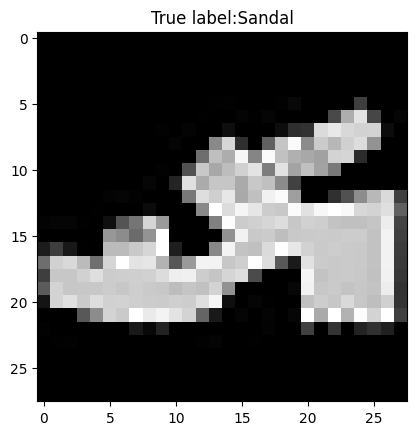

In [58]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(f"True label:{class_names[test_labels[0]]}")

In [59]:
# make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                              device=device)
pred_probs[:2]

tensor([[3.7217e-08, 5.8040e-10, 4.4380e-06, 6.7880e-07, 4.7527e-05, 6.3543e-01,
         1.9962e-06, 1.2271e-01, 5.8912e-03, 2.3591e-01],
        [2.1579e-02, 4.0070e-01, 1.4260e-03, 5.3380e-01, 3.7102e-02, 5.9959e-08,
         5.3653e-03, 6.2403e-07, 1.7884e-05, 2.6485e-06]])

In [60]:
# convert predictions proebabilites to lales
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 3, 7, 4, 3, 0, 4, 7, 1, 9])

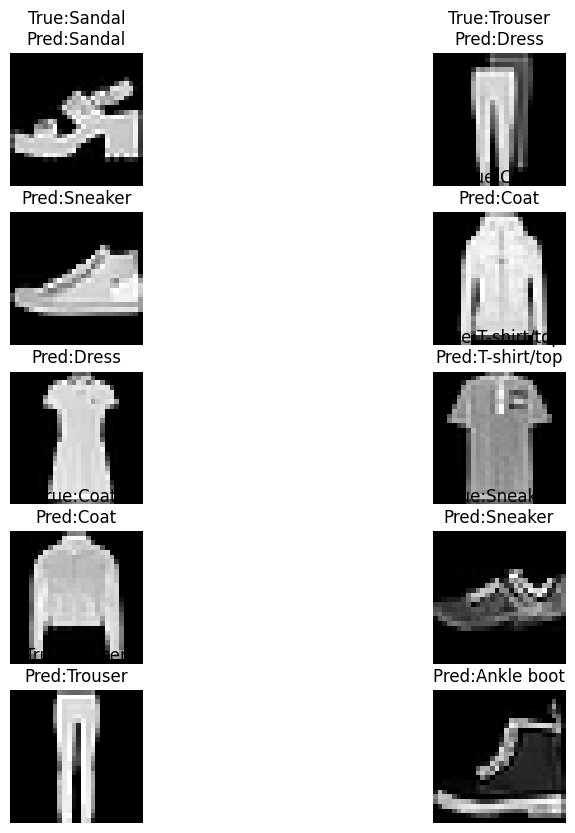

In [61]:
# plot predictions
plt.figure(figsize=(10,10))
for i,image in enumerate(test_samples):
  plt.subplot(5,2,i+1)
  plt.imshow(image.squeeze(),cmap="gray")
  plt.title(f"True:{class_names[test_labels[i]]}\nPred:{class_names[pred_classes[i]]}")
  plt.axis(False)
#

## making a confusion matrix

In [62]:
# import tqdm.auto
from tqdm.auto import tqdm
# make predictions with trained model
y_preds = []
y_true = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="making predictions..."):
    X,y = X.to(device),y.to(device)
    y_logits = model_2(X)
    # turn preidctions from logits to predictions porbability
    y_pred = torch.softmax(y_logits.squeeze(),dim=1).argmax(dim=1)
    # put prediction on cpu for evalution
    y_preds.append(y_pred.cpu())
    y_true.append(y.cpu())


making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [63]:

y_pred_tensor = torch.cat(y_preds)

# see if requried packages are installed if not install them ...
try:
  import torchmetrics, mlxtend
  from torchmetrics import ConfusionMatrix
  print("torchmetrics and mlxtend are already installed")
except:
  !pip install torchmetrics mlxtend
  from torchmetrics import ConfusionMatrix
  import mlxtend
  print("torchmetrics and mlxtend are installed")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.7/931.7 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [64]:
import mlxtend
print(mlxtend.__version__)

0.23.4


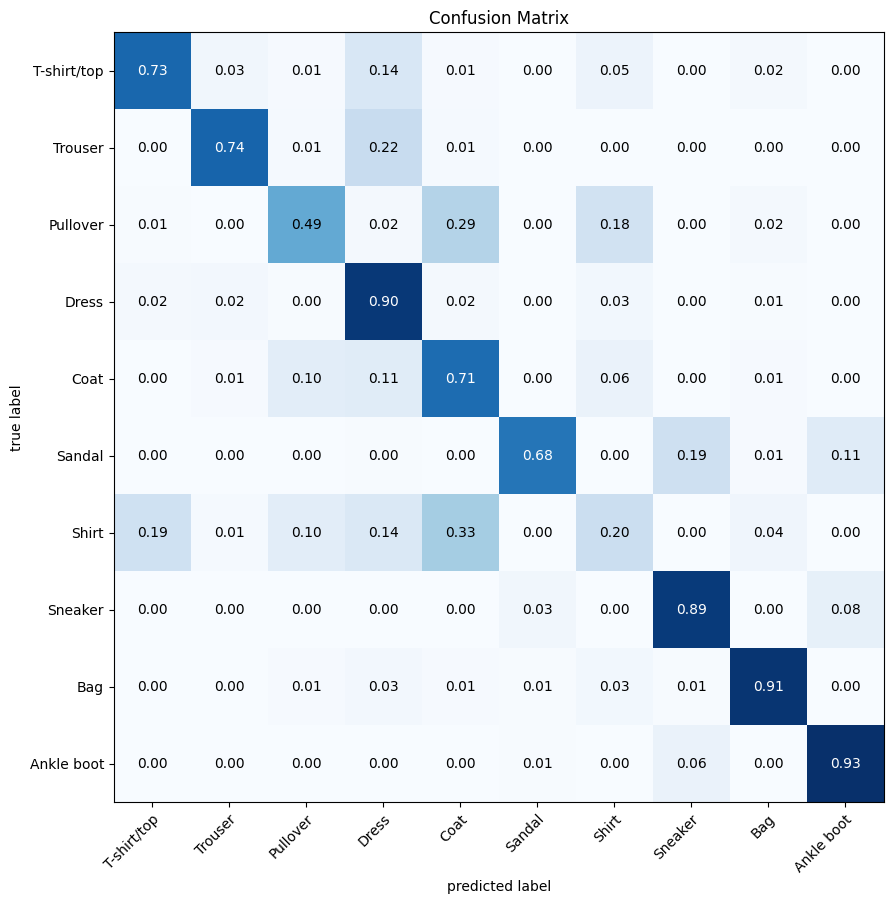

In [65]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
# setup confusion matrix instacne and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,target=test_data.targets)

# plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                 figsize=(10,10),
                                 show_normed=True,
                                 show_absolute=False,
                                 class_names=class_names)
plt.title("Confusion Matrix")
plt.show()


## save and load best performing model

In [66]:
from pathlib import Path

# create model dectory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
# create model save
MODEL_NAME = "fashion_mnist_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save model
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)
# crete a new model and put the state dict from the saved ones
model_3 = FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names))
model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
# this will have the same data as our model_2


<All keys matched successfully>

In [68]:
model = model_3

In [72]:
model

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [77]:
!pip install onnxruntime-gpu -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.3 MB/s eta 0:00:00


In [80]:
!pip install onnx -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 70.0 MB/s eta 0:00:00


In [81]:
dummy_input = torch.randn(1, 1, 28, 28, device=device)
model.to(device)
torch.onnx.export(model,
                  dummy_input, # Provide the dummy input here
                  "fashion_mnist_model.onnx",
                  input_names = ['input'],
                  output_names = ['output'])


In [82]:
import onnx
onnx_model = onnx.load("fashion_mnist_model.onnx")
onnx.checker.check_model(onnx_model)


In [84]:
dir(onnx_model)

['ByteSize',
 'Clear',
 'ClearExtension',
 'ClearField',
 'CopyFrom',
 'DESCRIPTOR',
 'DiscardUnknownFields',
 'Extensions',
 'FindInitializationErrors',
 'FromString',
 'HasExtension',
 'HasField',
 'IsInitialized',
 'ListFields',
 'MergeFrom',
 'MergeFromString',
 'ParseFromString',
 'RegisterExtension',
 'SerializePartialToString',
 'SerializeToString',
 'SetInParent',
 'UnknownFields',
 'WhichOneof',
 '_CheckCalledFromGeneratedFile',
 '_ListFieldsItemKey',
 '_SetListener',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__']

In [ ]:
import onnxruntime as ort
import numpy as np
x, y = test_data[0][0], test_data[0][1]
ort_sess = ort.InferenceSession('fashion_mnist_model.onnx')
outputs = ort_sess.run(None, {'input': x.numpy()})

# Print Result
predicted, actual = classes[outputs[0][0].argmax(0)], classes[y]
print(f'Predicted: "{predicted}", Actual: "{actual}"')
